![alt text](<../images/just enough.png>)
# Just Enough Python for AI/Data Science
## Module 5: Plotting Basics with Matplotlib & Seaborn
>Visualizing data is crucial for understanding it and communicating insights. 

### Day 13 - Seaborn: Because Pretty Plots Win Hearts
----

##### Overview:

Welcome to Day 13, where you’ll take your data visualization skills to the next level with **Seaborn**. Seaborn builds on Matplotlib but focuses on creating **beautiful, informative, and statistical visualizations** with less code.

Today we will know how to:

- Create Seaborn plots such as scatterplots, barplots, boxplots, violinplots, and heatmaps.
- Customize plot aesthetics with themes, colors, and context.
- Combine features of Matplotlib and Seaborn for advanced customization.


#### 1. Why Seaborn?

Seaborn simplifies the process of creating advanced visualizations and provides default themes that make plots look professional. It’s particularly useful for statistical visualizations, such as working with distributions or categorical comparisons.

**Install Seaborn**

Make sure Seaborn is installed in your environment.


In [ ]:
#!pip3 install seaborn


To start:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


#### 2. Changing the Look and Feel
Seaborn makes it easy to change the overall **theme or style** of your plots. You can set styles globally, so all your plots look polished.

**Example: Setting Themes**

Seaborn offers several themes:

1. darkgrid (default)
2. whitegrid
3. dark
4. white
5. ticks

In [2]:
# Example dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.shape

(244, 7)

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

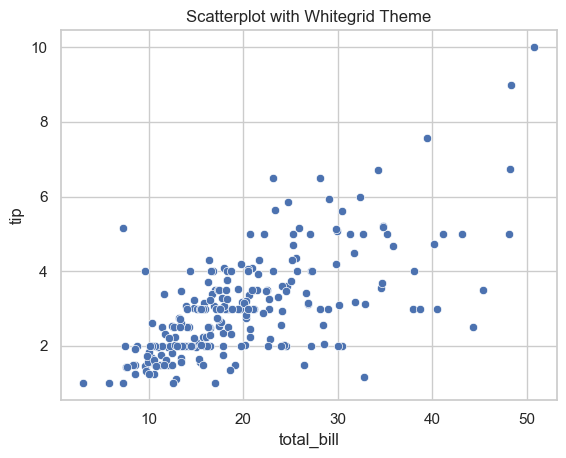

In [5]:
sns.set_theme(style="whitegrid")  # Change the theme, try different ones!
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Scatterplot with Whitegrid Theme")
plt.show()


#### 3. Common Seaborn Visualizations

**Scatter Plot**

Seaborn makes it easy to plot relationships between two numerical variables and add context with colors or markers.

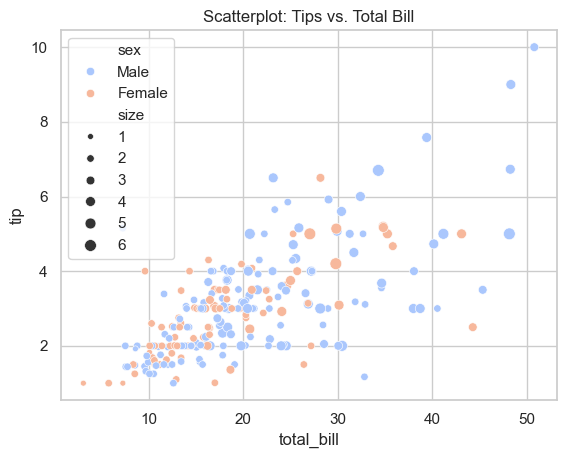

In [6]:
# Scatterplot with color for gender and size for table size
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", size="size", palette="coolwarm")
plt.title("Scatterplot: Tips vs. Total Bill")
plt.show()




Key features:

- `hue`: Adds color separation by a categorical variable.
- `size`: Adjusts the size of points based on another variable.
- `palette`: Choose a color palette (`"pastel", "coolwarm"`, etc.).


**Line Plot**

Line plots are useful for showing trends over time or continuous data relationships:

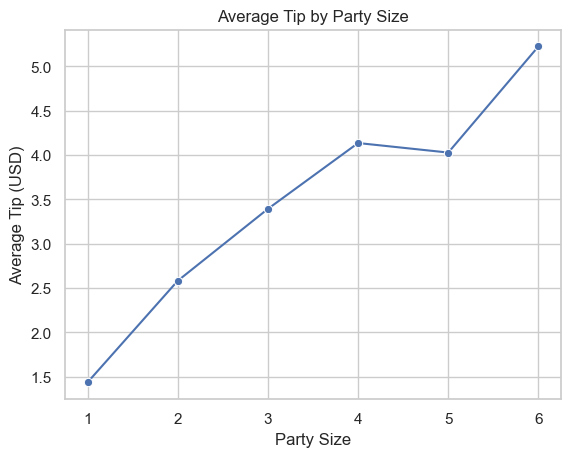

In [7]:
# Group by size and calculate average tip
avg_tip_by_size = tips.groupby("size")["tip"].mean().reset_index()

# Create the line plot
sns.lineplot(data=avg_tip_by_size, x="size", y="tip", marker="o")
plt.title("Average Tip by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Average Tip (USD)")
plt.show()

In [8]:
# Example line plot
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [9]:
fmri.shape

(1064, 5)

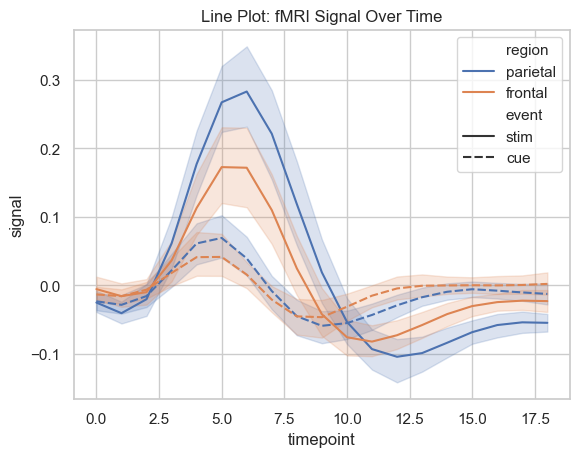

In [10]:

sns.lineplot(data=fmri, x="timepoint", y="signal", hue="region", style="event")
plt.title("Line Plot: fMRI Signal Over Time")
plt.show()


Key features:

- `style`: Adds different line styles (e.g., dashed, solid).
- Automatically handles overlapping lines.

**Bar Plot**

Bar plots are incredibly handy for comparing categories.

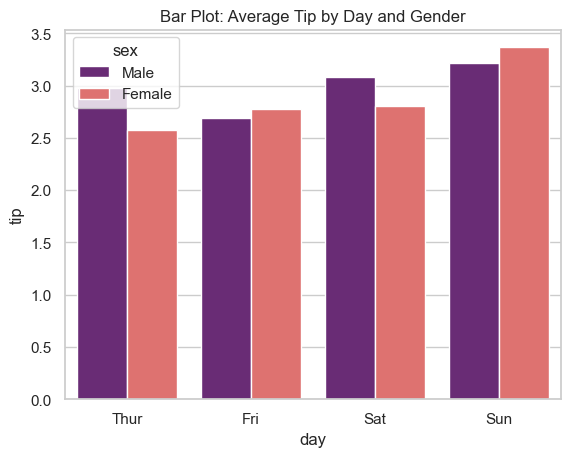

In [11]:
# Average tip by day
sns.barplot(data=tips, x="day", y="tip", hue="sex", palette="magma", errorbar=None)
plt.title("Bar Plot: Average Tip by Day and Gender")
plt.show()


Key features:

- `hue`: Separates categories into subgroups.
- Calculates **means** by default (but you can change it to other statistics).

**Box Plot**

Box plots summarize data distributions with quartiles, medians, and potential outliers.

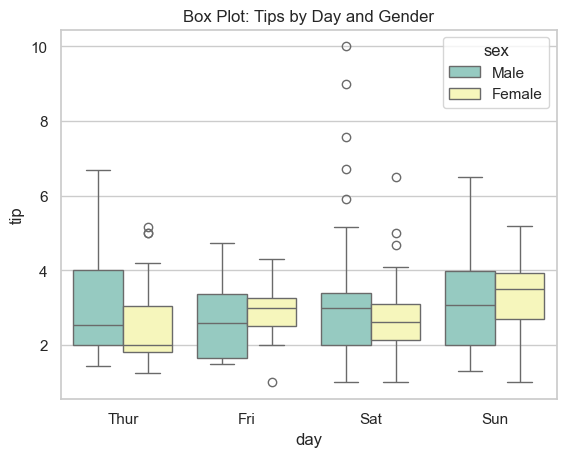

In [14]:
# Distribution of tips by day, split by gender
sns.boxplot(data=tips, x="day", y="tip", hue="sex", palette="Set3")
plt.title("Box Plot: Tips by Day and Gender")
plt.show()


**Violin Plot**

Violin plots combine box plots with a kernel density estimate, making them great for seeing distributions.

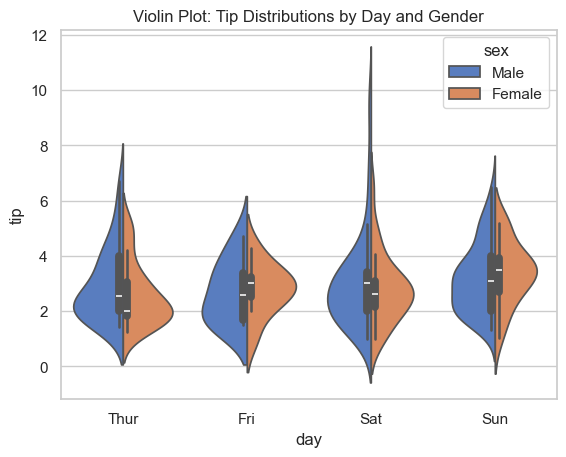

In [15]:
# Violin plot with split categories
sns.violinplot(data=tips, x="day", y="tip", hue="sex", split=True, palette="muted")
plt.title("Violin Plot: Tip Distributions by Day and Gender")
plt.show()


**Distribution Plot**

Distplot, histplot, or kdeplot (Kernel Density Estimate) is used to visualize the distribution of a single variable.

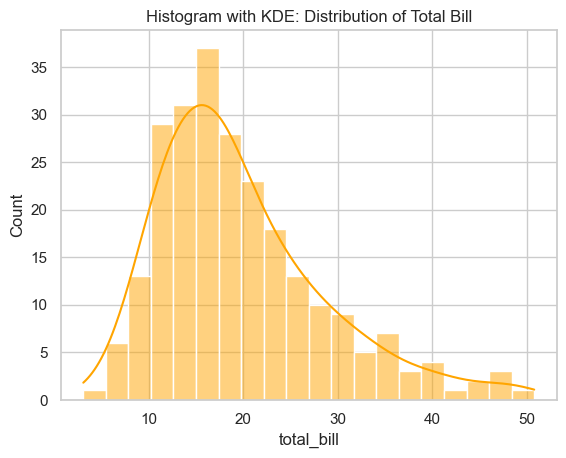

In [18]:
# Distributions of tips
sns.histplot(data=tips, x="total_bill", kde=True, bins=20, color="orange")
plt.title("Histogram with KDE: Distribution of Total Bill")
plt.show()


For a smoother **kdeplot**:

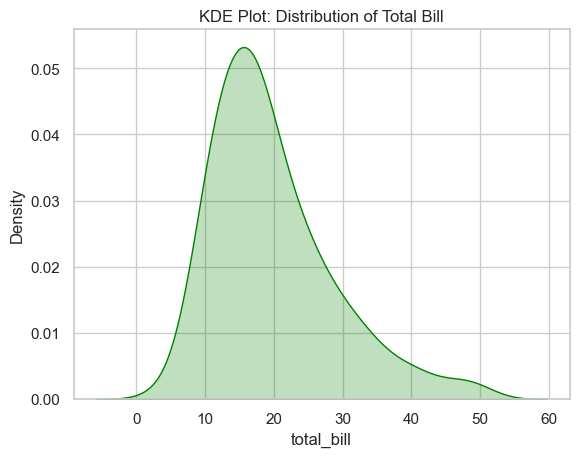

In [19]:
sns.kdeplot(data=tips, x="total_bill", fill=True, color="green")
plt.title("KDE Plot: Distribution of Total Bill")
plt.show()


**Heatmap**

Heatmaps are used for displaying correlation matrices or other 2D tabular data.

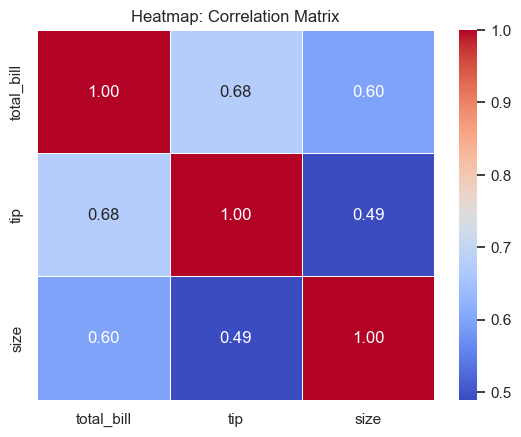

In [20]:
# Compute correlation matrix only for numeric columns
numeric_tips = tips.select_dtypes(include='number')
corr = numeric_tips.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Matrix")
plt.show()


#### 4. Combining Plots
Seaborn allows you to combine multiple plot types for deeper insights.

**Example: Pairwise Relationships**

Using `pairplot()` to visualize pairwise relationships between features:

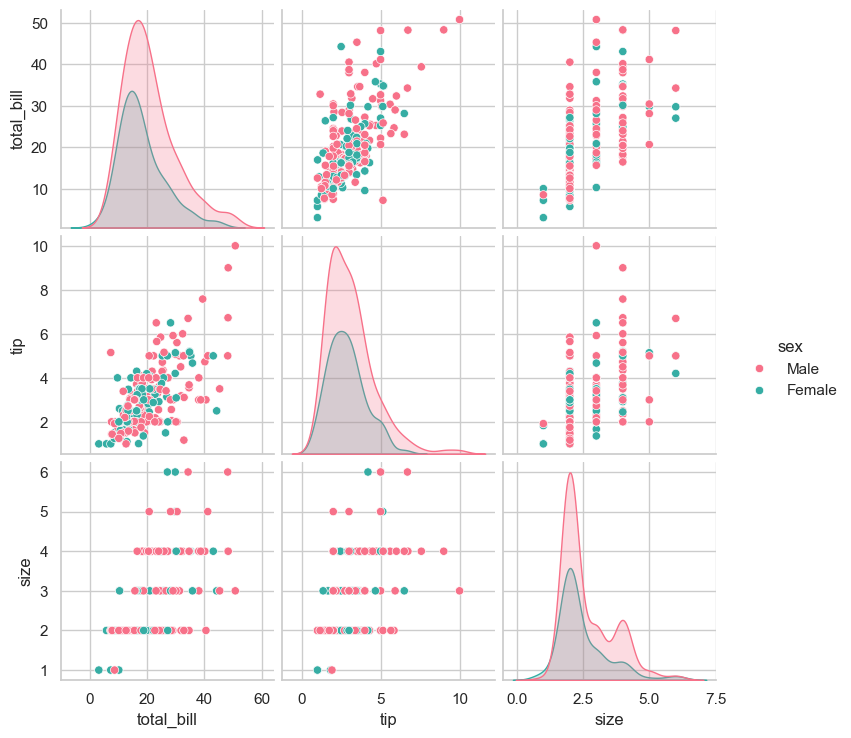

In [21]:
sns.pairplot(tips, hue="sex", palette="husl")
plt.show()



**Example: Jointplots**

A joint plot combines scatterplots and distribution plots:

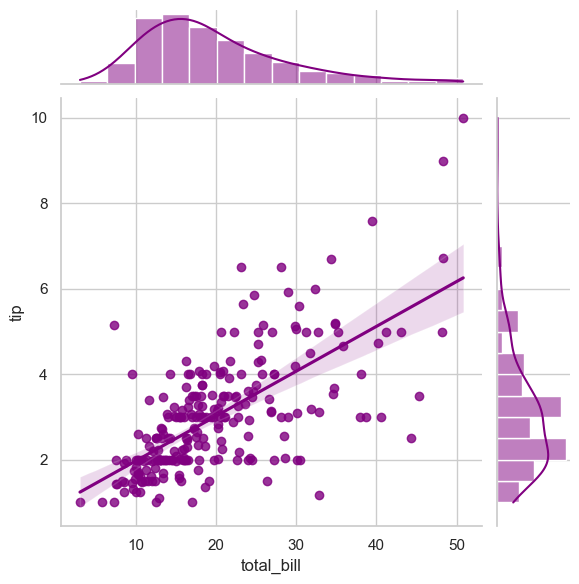

In [22]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg", color="purple")  # Add a regression line
plt.show()


#### 5. Advanced Customizations

**Adding Titles and Styling**

You can add titles, resize plots, and adjust other style elements:

C:\Users\Satish Singh\AppData\Local\Temp\ipykernel_5952\2425182907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x="day", y="total_bill", palette="viridis")


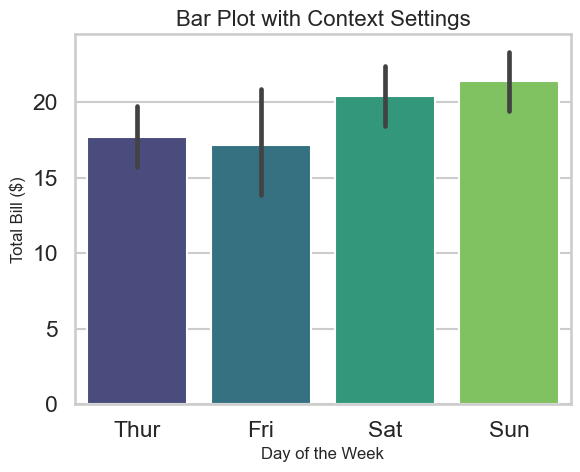

In [23]:
sns.set_context("talk")  # Better for presentation-sized plots
sns.barplot(data=tips, x="day", y="total_bill", palette="viridis")
plt.title("Bar Plot with Context Settings", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Bill ($)", fontsize=12)
plt.show()



**Custom Color Palettes**

Choose from built-in palettes or create your own:



C:\Users\Satish Singh\AppData\Local\Temp\ipykernel_5952\810583361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tips, x="day", y="total_bill", palette=custom_palette)


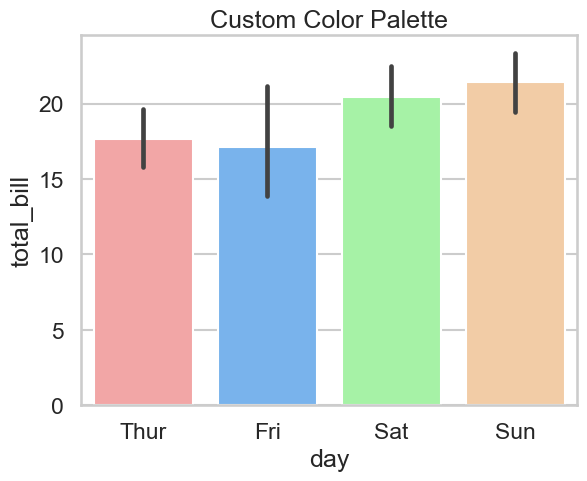

In [24]:
# Built-in palettes
sns.set_palette("Blues")

# Custom palettes
custom_palette = sns.color_palette(["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"])
sns.barplot(data=tips, x="day", y="total_bill", palette=custom_palette)
plt.title("Custom Color Palette")
plt.show()



#### 7. Saving Your Plots
Once you’ve created the perfect plot, save it to a file for use in presentations or reports.

**Save as PNG, JPEG, PDF, or SVG**

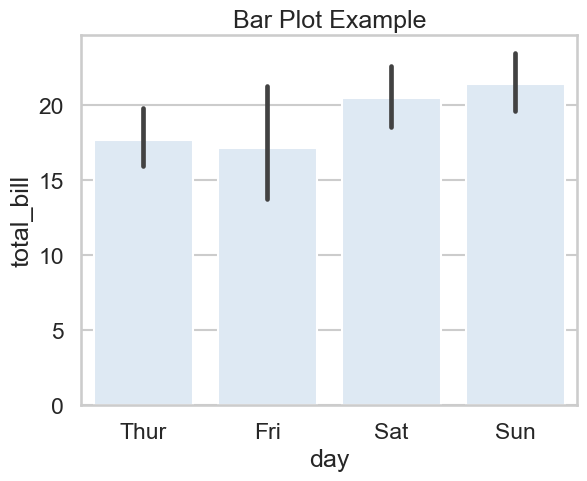

In [25]:
sns.barplot(data=tips, x="day", y="total_bill")
plt.title("Bar Plot Example")
plt.savefig("barplot_example.png", dpi=300, bbox_inches="tight")  # Save as a PNG



----
#### Quick Exercises
1. Scatter Plot:

    - Use the `tips` dataset to create a scatter plot showing the relationship between `total_bill` and `tip`.

    - Add `hue` based on the `sex` column, customize colors, and increase marker size.

2. Bar Plot:

    - Create a bar plot showing the average `total_bill` for each `day`, split by `sex`.

    - Use a color palette of your choice.

3. Box and Violin Plots:

    - Compare the `total_bill` distributions for each `day` using a boxplot and violinplot.

    - Include the `hue` parameter to separate by smoker.

4. Heatmap:

    - Compute the correlation matrix of the `tips` dataset and create a heatmap with labels and a `coolwarm` palette.

5. Pairplot:

    - Use pairplot to display pairwise relationships between all numerical variables in the `tips` dataset. Differentiate by the `sex` column.



**Please Note:** The solutions to above questions will be present at the end of next session's (Day 14 - Your First ML model) Notebook.


---- 


### Day 12 Exercise Solution

1. Line Plot:

    - Plot the for the y = 2x² - 5x + 3 for x values ranging from -10 to 10.

    - Add a title, axis labels, and a legend.

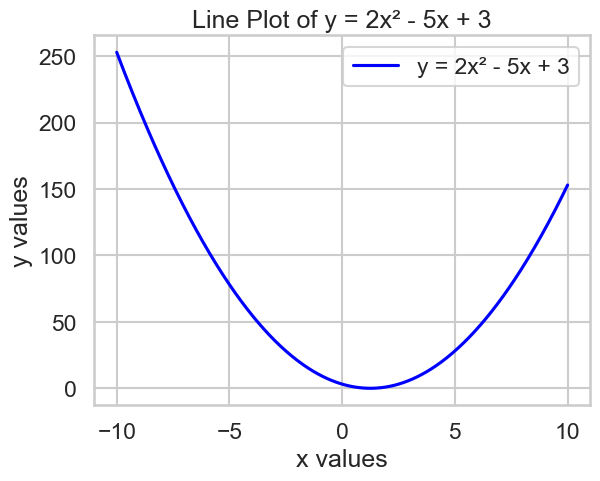

In [26]:
import numpy as np


# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Compute y values
y = 2 * x**2 - 5 * x + 3

# Create the line plot
plt.plot(x, y, label='y = 2x² - 5x + 3', color='blue')

# Add title and labels
plt.title("Line Plot of y = 2x² - 5x + 3")
plt.xlabel("x values")
plt.ylabel("y values")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

2. Scatter Plot:

    - Create a scatter plot for two random 1D arrays of size 50.
    - Customize the scatter points with a specific marker, size, and color.

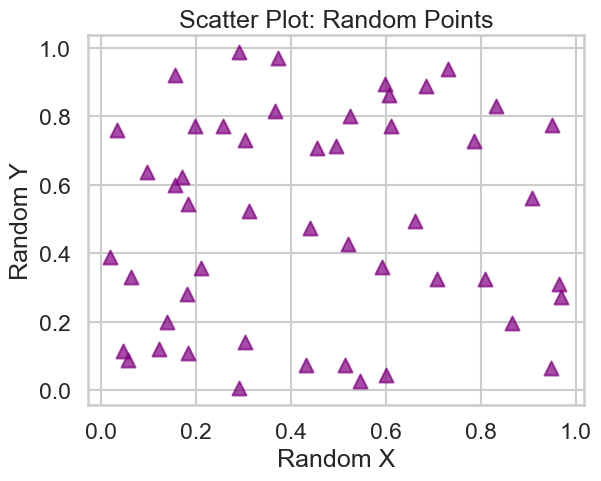

In [27]:
# Generate two random arrays of size 50
np.random.seed(42)  # For reproducibility
x = np.random.rand(50)
y = np.random.rand(50)

# Create a scatter plot
plt.scatter(x, y, color='purple', marker='^', s=100, alpha=0.7)

# Add title and labels
plt.title("Scatter Plot: Random Points")
plt.xlabel("Random X")
plt.ylabel("Random Y")

# Show grid and plot
plt.grid(True)
plt.show()

3. Bar Plot:

    - Visualize the monthly sales of a store (`sales = [400, 370, 450, 500, 480]`) for months January to May.
    - Use a horizontal bar plot with different colors for each bar.

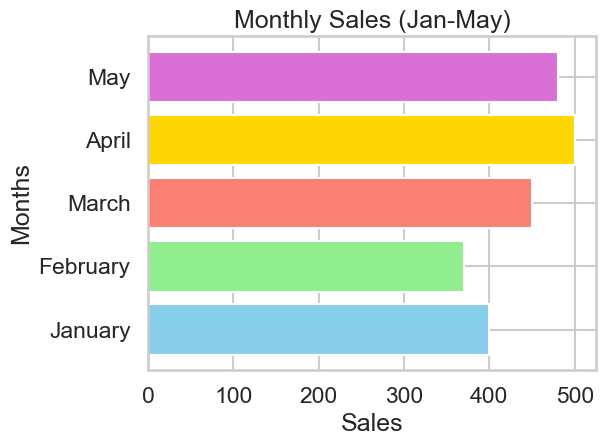

In [28]:
# Data
months = ['January', 'February', 'March', 'April', 'May']
sales = [400, 370, 450, 500, 480]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid']

# Create horizontal bar plot
plt.barh(months, sales, color=colors)

# Add title and labels
plt.title("Monthly Sales (Jan-May)")
plt.xlabel("Sales")
plt.ylabel("Months")

# Show plot
plt.tight_layout()
plt.show()

4. Histogram:

    - Generate 150 random values between 0 and 100. Plot a histogram with 8 bins and customize its appearance.
    - Add appropriate axis labels and gridlines.

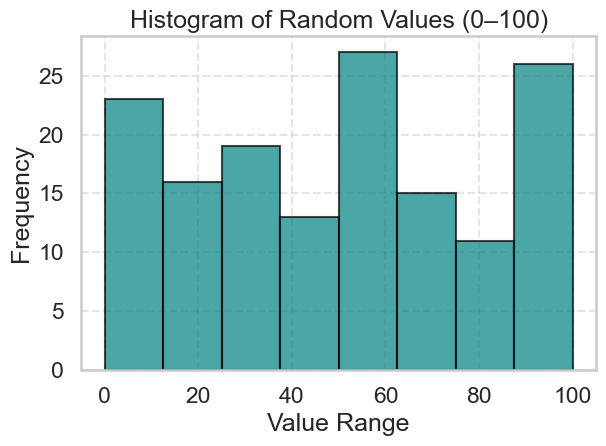

In [29]:
# Generate 150 random values between 0 and 100
data = np.random.randint(0, 101, 150)

# Create histogram with 8 bins
plt.hist(data, bins=8, color='teal', edgecolor='black', alpha=0.7)

# Customize plot
plt.title("Histogram of Random Values (0–100)")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

5. Subplots:

    - Create subplots for:
        - A line plot of y = x.
        - A scatter plot of two random arrays.

    - Adjust the spacing between the subplots.


In [31]:
# Data for line plot
x = np.linspace(-10, 10, 100)
y = x

# Data for scatter plot
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)


C:\Users\Satish Singh\AppData\Local\Temp\ipykernel_5952\154945602.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


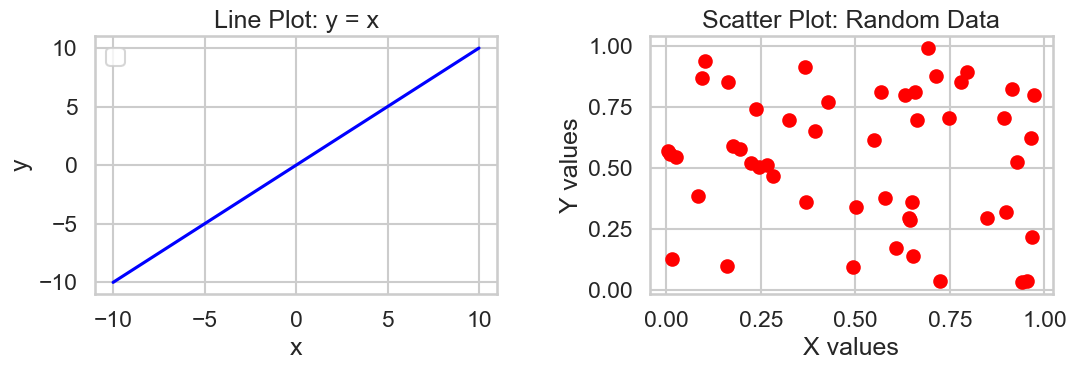

In [32]:
# Using plt.subplots() to create multiple plots in one figure


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Line plot
axs[0].plot(x, y, color='blue')
axs[0].set_title("Line Plot: y = x")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()
axs[0].grid(True)

# Scatter plot
axs[1].scatter(x_scatter, y_scatter, color='red', marker='o')
axs[1].set_title("Scatter Plot: Random Data")
axs[1].set_xlabel("X values")
axs[1].set_ylabel("Y values")
axs[1].grid(True)

# Adjust spacing
plt.tight_layout(pad=3.0)

# Show plots
plt.show()


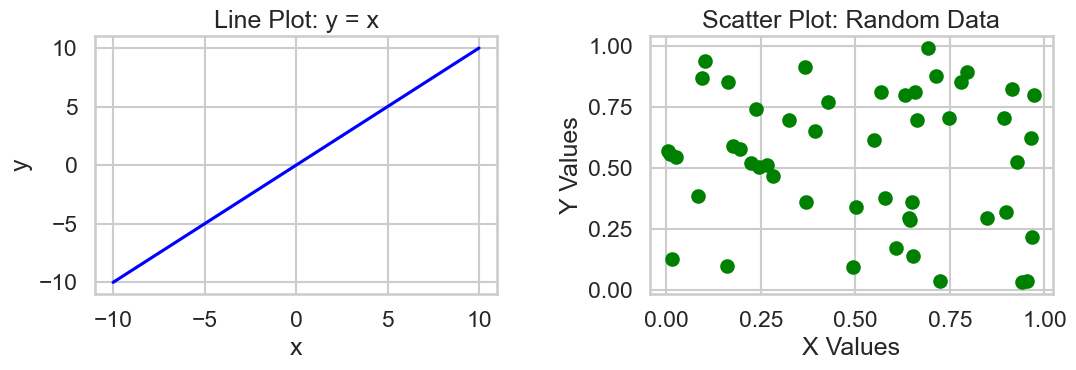

In [33]:
# Using plt.subplot() to create multiple plots in one figure
# Create figure
plt.figure(figsize=(12, 5))

# Line plot in subplot 1
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st plot)
plt.plot(x, y, color='blue')
plt.title("Line Plot: y = x")
plt.xlabel("x")
plt.ylabel("y")

# Scatter plot in subplot 2
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd plot)
plt.scatter(x_scatter, y_scatter, color='green', marker='o')
plt.title("Scatter Plot: Random Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# HAPPY LEARNING